In [1]:
'''

This code is part of the SIPN2 project focused on improving sub-seasonal to seasonal predictions of Arctic Sea Ice. 
If you use this code for a publication or presentation, please cite the reference in the README.md on the
main page (https://github.com/NicWayand/ESIO). 

Questions or comments should be addressed to nicway@uw.edu

Copyright (c) 2018 Nic Wayand

GNU General Public License v3.0


'''

'''
Plot exetent/area from observations and models (past and future)
'''

%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt, mpld3
from collections import OrderedDict
import itertools
import numpy as np
import numpy.ma as ma
import pandas as pd
import struct
import os
import xarray as xr
import glob
import datetime
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')

import esio
import esiodata as ed

# General plotting settings
sns.set_style('whitegrid')
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 2.5})

/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  Fi

In [2]:
# Plotting Info
runType = 'forecast'
variables = ['sic'] #, 'hi'
metric1 = 'extent'

In [3]:
# Initialization times to plot
cd = datetime.datetime.now()
cd = datetime.datetime(cd.year, cd.month, cd.day) # Assumes hours 00, min 00
SD = cd - datetime.timedelta(days=40)
ED = cd + datetime.timedelta(days=365)

In [4]:
# Info about models runs
# icePredicted = {'gfdlsipn':True, 'piomas':True, 'yopp':True, 'bom':False, 'cma':True, 'ecmwf':True, 
#               'hcmr':False, 'isaccnr':False, 'jma':False, 'metreofr':True, 'ukmo':True, 'eccc':False, 
#               'kma':True, 'ncep':True, 'ukmetofficesipn':True, 'ecmwfsipn':True}
# biasCorrected = 

In [5]:
#############################################################
# Load in Data
#############################################################
E = ed.esiodata.load()

In [6]:


# Load in Observations
# ds_51 = xr.open_mfdataset(E.obs['NSIDC_0051']['sipn_nc']+'/*.nc',
#                         concat_dim='time', autoclose=True, 
#                         compat='no_conflicts', data_vars=['sic','extent','area'])['extent']
# ds_81 = xr.open_mfdataset(E.obs['NSIDC_0081']['sipn_nc']+'/*.nc', concat_dim='time', autoclose=True)
# ds_79 = xr.open_mfdataset(E.obs['NSIDC_0079']['sipn_nc']+'/*.nc',
#                         concat_dim='time', autoclose=True, 
#                         compat='no_conflicts', data_vars=['sic','extent','area'])['extent']
ds_ext = xr.open_dataset(os.path.join(E.obs['NSIDC_extent']['sipn_nc'], 'N_seaice_extent_daily_v3.0.nc'))
ds_ext = ds_ext.rename({'datetime':'time'})

In [7]:
# Combine extent obs using highest quality first
ds_obs = ds_ext #.Extent.combine_first(da_79).combine_first(da_51).combine_first(da_81)

In [8]:
# Load in regional data
# Note minor -0.000004 degree differences in latitude
ds_region = xr.open_dataset(os.path.join(E.grid_dir, 'sio_2016_mask_Update.nc'))

In [9]:
ds_per = ds_obs.sel(time=slice('1980','2010'))
DOY = [x.timetuple().tm_yday for x in pd.to_datetime(ds_per.time.values)]
ds_per['time'] = DOY # replace
ds_per_mean = ds_per.groupby('time').mean().Extent
ds_per_std = ds_per.groupby('time').std().Extent
# Adjust dates to this year
cdate = datetime.datetime.now()
ds_per_mean['time'] = (ds_per_mean.time -1).astype('timedelta64[D]') + np.datetime64(datetime.datetime(cdate.year,1,1))
ds_per_std['time'] = (ds_per_std.time -1).astype('timedelta64[D]') + np.datetime64(datetime.datetime(cdate.year,1,1))
# append next year because some plots go into future
ds_per_mean_2 = ds_per_mean.copy()
ds_per_std_2 = ds_per_std.copy()

ds_per_mean_2['time'] = ds_per_mean_2.time + np.timedelta64(ds_per_mean.time.size,'D')
ds_per_mean = xr.concat([ds_per_mean,ds_per_mean_2], dim='time')

ds_per_std_2['time'] = ds_per_std_2.time + np.timedelta64(ds_per_std.time.size,'D')
ds_per_std = xr.concat([ds_per_std,ds_per_std_2], dim='time')

# Plot Raw extents and only models that predict sea ice

gfdlsipn
Plotting...


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


51.236802663013805  seconds.
piomas
yopp
Plotting...
37.98960969096515  seconds.
cma
Plotting...
9.492182233952917  seconds.
ecmwf
Plotting...
1.8128668870194815  seconds.
metreofr
Plotting...
0.5176859389757738  seconds.
ukmo
Plotting...
6.208569113980047  seconds.
kma
Plotting...
5.967602783988696  seconds.
ncep
Plotting...
4.508268497011159  seconds.
ukmetofficesipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 52
  (nparts / max_parts))
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 56
  (nparts / max_parts))
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 62
  (nparts / max_parts))


Plotting...
63.73062813899014  seconds.
ecmwfsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 25
  (nparts / max_parts))


Plotting...
245.88739332795376  seconds.
usnavysipn
Plotting...
0.0015857500256970525  seconds.
usnavyncep
Plotting...
0.23429926799144596  seconds.
Plotting observations


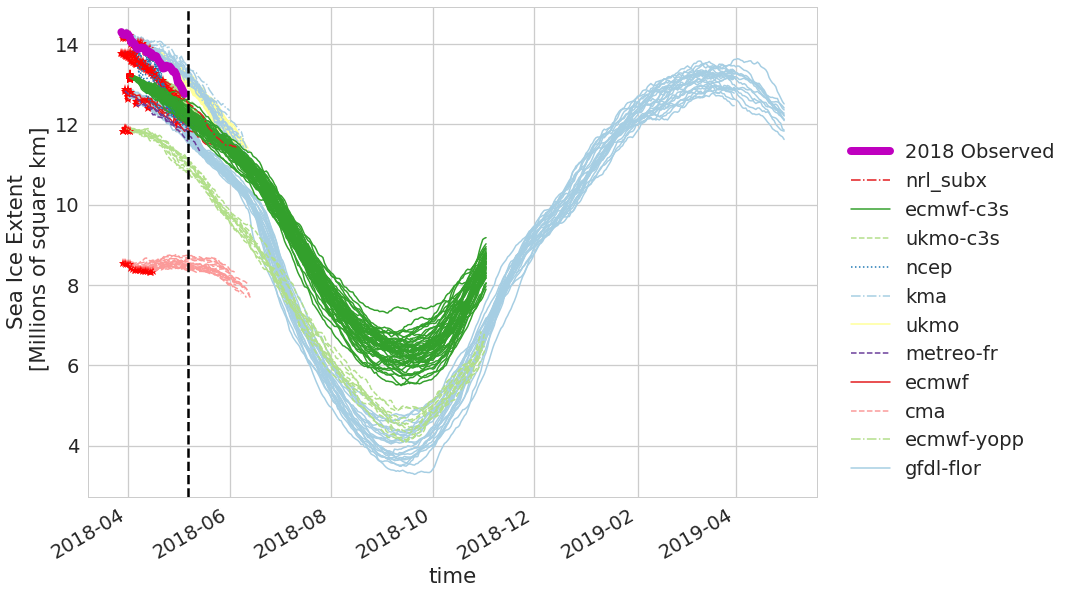

In [10]:
# cmap_c = itertools.cycle(sns.color_palette("Paired", len(E.model.keys()) ))
# linecycler = itertools.cycle(["-","--","-.",":","--"])
for cvar in variables:
    
    fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar, "timeseries")
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)

    # New Plot
    f = plt.figure(figsize=(15,10))
    ax1 = plt.subplot(1, 1, 1) # Observations

    for (i, cmod) in enumerate(E.model.keys()):
#     for (i, cmod) in enumerate(['yopp']):
        
        if not E.icePredicted[cmod]:
            continue
        print(cmod)
        # Load in Model
        model_forecast = os.path.join(E.model[cmod][runType]['sipn_nc'], '*.nc')

        # Check we have files 
        files = glob.glob(model_forecast)
        if not files:
            #print("Skipping model", cmod, "no forecast files found.")
            continue # Skip this model
        ds_model = xr.open_mfdataset(model_forecast, 
                                     chunks={'ensemble': 1, 'fore_time': 1, 'init_time': 1, 'nj': 304, 'ni': 448})
        ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)
#         print(ds_model)
        
        # Select var of interest (if available)
        if cvar in ds_model.variables:
            ds_model = ds_model[cvar]
        else:
            continue
        
        # Select init of interest
        ds_model = ds_model.where(ds_model.init_time>=np.datetime64(SD), drop=True)
        
        # Select last init
#         ds_model = ds_model.sel(init_time=ds_model.init_time.values[-1]).expand_dims('init_time')
#         print('only plotting last one inits')

#         Reduce to extent or area
        if metric1 == 'extent':
#             ds_model = ((ds_model >= 0.15).astype('int') * ds_region.area).sum(dim='x').sum(dim='y')/(10**6)
            ds_model = esio.calc_extent(ds_model, ds_region)
        else:
            raise ValueError('Not implemented')
            
        # Get model plotting specs
        cc = E.model_color[cmod]
        cl = E.model_linestyle[cmod]

        # Plot Model
        print('Plotting...')
#         print(ds_model)
        if i == 1: # Control only one initiailzation label in legend
            no_init_label = False
        else:
            no_init_label = True
        import timeit
        start_time = timeit.default_timer()
        #ds_model.load()
#         print(ds_model)
        esio.plot_reforecast(ds=ds_model, axin=ax1, 
                             labelin=E.model[cmod]['model_label'],
                             color=cc, marker=None,
                             linestyle=cl,
                             no_init_label=no_init_label)
        print( (timeit.default_timer() - start_time), ' seconds.' )
        
        # Memeory clean up
        ds_model = None
        
    # Plot observations
    print('Plotting observations')
    ds_obs.Extent.where(ds_obs.time>=np.datetime64(SD)).plot(ax=ax1, label=str(cdate.year)+' Observed', color='m', linewidth=8)
    ax1.set_ylabel('Sea Ice Extent\n [Millions of square km]')
    cxlims = ax1.get_xlim()

#     # 1980-2010 Historical Interquartile Range
#     plt.fill_between(ds_per_mean.time.values, ds_per_mean + ds_per_std, 
#                  ds_per_mean - ds_per_std, alpha=0.35, label='1980-2010\nInterquartile Range', color='m')
    ax1.set_xlim(cxlims) # fix x limits
    cylims = ax1.get_ylim()
    
    # Plot current date line
    ax1.plot([cd, cd], [cylims[0], cylims[1]], color='k', linestyle='--')
    
    # Add legend (static)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1], loc='lower right',bbox_to_anchor=(1.35, 0))
    
    f.autofmt_xdate()
    ax1.set_ylim(cylims)
    plt.subplots_adjust(right=.8)
        
    # Save to file
    f_out = os.path.join(fig_dir,'panArctic_'+metric1+'_'+runType+'_raw_predicted.png')
    f.savefig(f_out,bbox_inches='tight',dpi=200)
    mpld3.save_html(f, os.path.join(fig_dir,'panArctic_'+metric1+'_'+runType+'_raw_predicted.html'))


# Plot raw extents

gfdlsipn
Plotting...


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/local.py:271: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


45.102759980014525  seconds.
piomas
yopp
Plotting...
35.202944189019036  seconds.
bom
Plotting...
2.480464641994331  seconds.
cma
Plotting...
6.873051917005796  seconds.
ecmwf
Plotting...
1.3125124410144053  seconds.
hcmr
Plotting...
1.0241704539512284  seconds.
isaccnr
Plotting...
0.6637825089856051  seconds.
jma
Plotting...
0.5452904910198413  seconds.
metreofr
Plotting...
0.5483123530284502  seconds.
ukmo
Plotting...
6.766639522043988  seconds.
eccc
Plotting...
0.5534133740002289  seconds.
kma
Plotting...
6.725773159007076  seconds.
ncep
Plotting...
5.023273013997823  seconds.
ukmetofficesipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 52
  (nparts / max_parts))
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 56
  (nparts / max_parts))
/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 62
  (nparts / max_parts))


Plotting...
65.82957828597864  seconds.
ecmwfsipn


/home/disk/sipn/nicway/anaconda3/envs/esio/lib/python3.6/site-packages/dask/array/core.py:2187: UserWarning: Increasing number of chunks by factor of 25
  (nparts / max_parts))


Plotting...
248.56534506502794  seconds.
usnavysipn
Plotting...
0.0014754460426047444  seconds.
usnavyncep
Plotting...
0.23504136502742767  seconds.
Plotting observations


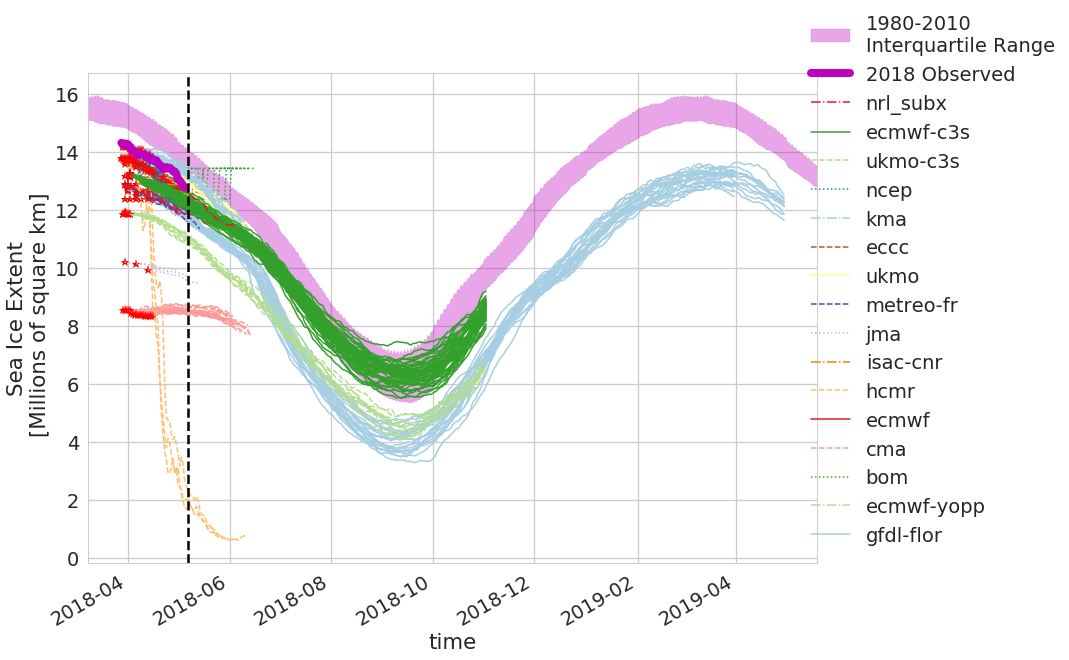

In [11]:
for cvar in variables:
    
    fig_dir = os.path.join(E.fig_dir, 'model', 'all_model', cvar, "timeseries")
    if not os.path.exists(fig_dir):
        os.makedirs(fig_dir)

    # New Plot
    f = plt.figure(figsize=(15,10))
    ax1 = plt.subplot(1, 1, 1) # Observations

    for (i, cmod) in enumerate(E.model.keys()):
#     for (i, cmod) in enumerate(['ukmetofficesipn']):
        print(cmod)

        # Load in Model
        model_forecast = os.path.join(E.model[cmod][runType]['sipn_nc'], '*.nc')

        # Check we have files 
        files = glob.glob(model_forecast)
        if not files:
            #print("Skipping model", cmod, "no forecast files found.")
            continue # Skip this model
        ds_model = xr.open_mfdataset(model_forecast, 
                                     chunks={'ensemble': 1, 'fore_time': 1, 'init_time': 1, 'nj': 304, 'ni': 448})
        ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)
#         print(ds_model)
        
        # Select var of interest (if available)
        if cvar in ds_model.variables:
            ds_model = ds_model[cvar]
        else:
            continue
        
        # Select init of interest
        ds_model = ds_model.where(ds_model.init_time>=np.datetime64(SD), drop=True)
        
        # Select last init
#         ds_model = ds_model.sel(init_time=ds_model.init_time.values[-1]).expand_dims('init_time')
#         print('only plotting last one inits')

#         Reduce to extent or area
        if metric1 == 'extent':
#             ds_model = ((ds_model >= 0.15).astype('int') * ds_region.area).sum(dim='x').sum(dim='y')/(10**6)
            ds_model = esio.calc_extent(ds_model, ds_region)
        else:
            raise ValueError('Not implemented')
            
        # Get color
        cc = E.model_color[cmod]
        cl = E.model_linestyle[cmod]

        # Plot Model
        print('Plotting...')
#         print(ds_model)
        if i == 1: # Control only one initiailzation label in legend
            no_init_label = False
        else:
            no_init_label = True
        import timeit
        start_time = timeit.default_timer()
        #ds_model.load()
#         print(ds_model)
        esio.plot_reforecast(ds=ds_model, axin=ax1, 
                             labelin=E.model[cmod]['model_label'],
                             color=cc, marker=None,
                             linestyle=cl,
                             no_init_label=no_init_label)
        print( (timeit.default_timer() - start_time), ' seconds.' )
        
        # Memeory clean up
        ds_model = None
        
    # Plot observations
    print('Plotting observations')
    ds_obs.Extent.where(ds_obs.time>=np.datetime64(SD)).plot(ax=ax1, label=str(cdate.year)+' Observed', color='m', linewidth=8)
    ax1.set_ylabel('Sea Ice Extent\n [Millions of square km]')
    cxlims = ax1.get_xlim()

    # 1980-2010 Historical Interquartile Range
    plt.fill_between(ds_per_mean.time.values, ds_per_mean + ds_per_std, 
                 ds_per_mean - ds_per_std, alpha=0.35, label='1980-2010\nInterquartile Range', color='m')
    ax1.set_xlim(cxlims) # fix x limits
    cylims = ax1.get_ylim()
    
    # Plot current date line
    ax1.plot([cd, cd], [cylims[0], cylims[1]], color='k', linestyle='--')
    
    # Add legend (static)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(handles[::-1], labels[::-1], loc='lower right',bbox_to_anchor=(1.35, 0))
    
    f.autofmt_xdate()
    ax1.set_ylim(cylims)
    plt.subplots_adjust(right=.8)
        
    # Save to file
    f_out = os.path.join(fig_dir,'panArctic_'+metric1+'_'+runType+'_raw_all.png')
    f.savefig(f_out,bbox_inches='tight',dpi=200)
#     mpld3.save_html(f, os.path.join(fig_dir,'panArctic_'+metric1+'_'+runType+'_raw_all.html'))


In [12]:
# Testing memory usage

# i=0
# cmod ='ukmetofficesipn'

# # Load in Model
# model_forecast = os.path.join(E.model[cmod][runType]['sipn_nc'], '*.nc')

# # Check we have files 
# files = glob.glob(model_forecast)

# ds_model = xr.open_mfdataset(model_forecast, chunks={'ensemble': 1, 'fore_time': 1, 'init_time': 1, 'nj': 304, 'ni': 448})
# ds_model.rename({'nj':'x', 'ni':'y'}, inplace=True)
# ds_model



# cvar = 'sic'
# ds_model = ds_model[cvar]

# f = plt.figure(figsize=(15,10))
# ax1 = plt.subplot(1, 1, 1) # Observations
# esio.plot_reforecast(ds=ds_model, ds_region=ds_region,
#                      axin=ax1, 
#                      labelin=E.model[cmod]['model_label'],
#                      color='r', marker=None,
#                      linestyle=next(linecycler),
#                      no_init_label=False)